## **Prediction Using Unsupervised ML**

### **(Level-Beginner)**

Predict the optimum number of clusters from the given famous 'Iris' dataset and represent them visually.

## **Author: Syeda Fatima Ali**

### **TSF-GRIP Task Submission**

### **Libraries Imported**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Iris dataset load as pandas dataframe**

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x=iris.data
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state= 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


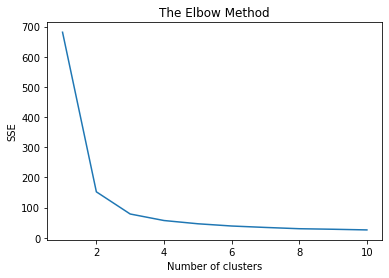

In [6]:
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### **Feature Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

### **k-means Classifier Training**
The optimum clusters is where the elbow occurs so we choose the number of clusters (k) as 3.

In [8]:
kmeans = KMeans(n_clusters=3, random_state= 0)
targetkmeans = kmeans.fit_predict(x)

## **Clustering Visualization**
For Simplicity we take petal legth (cm) and petal width (cm) to visualize clusters.
In the Iris dataset,
0 target is Iris setosa 
1 target label is Iris versicolour
2 target label is Iris virginica
Centroids of clusters are plotted using kmeans.cluster_centers_.

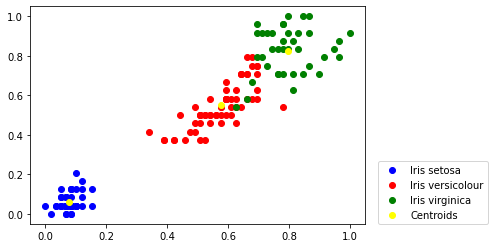

In [9]:
plt.scatter(x[targetkmeans == 0, 2], x[targetkmeans == 0, 3], c = 'blue', label = 'Iris setosa')
plt.scatter(x[targetkmeans == 1, 2], x[targetkmeans == 1, 3], c = 'red', label = 'Iris versicolour')
plt.scatter(x[targetkmeans == 2, 2], x[targetkmeans == 2, 3], c = 'green', label = 'Iris virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], c = 'yellow', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)